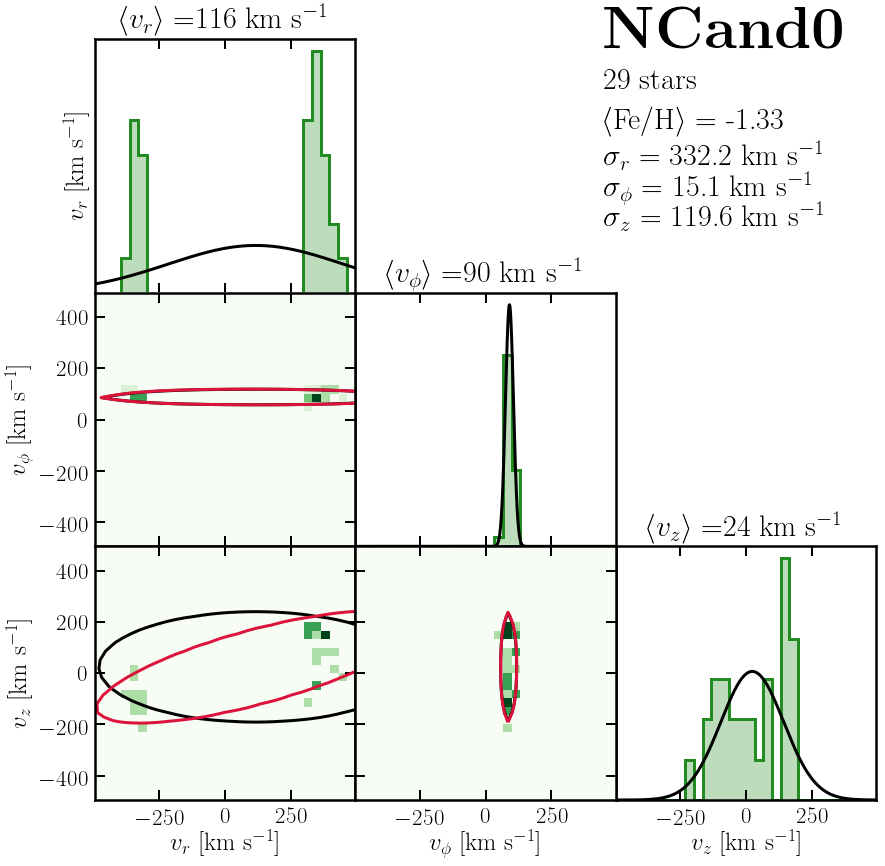

In [432]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas


df = pandas.read_csv('../GAIA_SDSS_substructures_next_30_cands.csv')
names = df.group_id.unique()
num_cands = size(names)

i_cand = 0
Cand = df.loc[df['group_id'] == names[i_cand]]
name = names[i_cand]
nstars = size(Cand,0)
feh = Cand.feh
vx = Cand.GalRVel
vy = Cand.GalTVel
vz = Cand.GalzVel

# S1 = pandas.read_csv('../S1_only_cat_simple.csv')
# name = 'S1'
# nstars = size(S1,0)
# v = zeros(shape=(nstars,3))
# vx = S1.GalRVel
# vy = S1.GalphiVel
# vz = S1.GalzVel

vx0 = mean(vx)
vy0 = mean(vy)
vz0 = mean(vz)
sigx = std(vx)
sigy = std(vy)
sigz = std(vz)


####

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, axarr = plt.subplots(3, 3,figsize=(14,14))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.0,hspace=0.0)
ax_x = plt.subplot(gs[0,0])
ax_y = plt.subplot(gs[1,1])
ax_z = plt.subplot(gs[2,2])

ax_yx = plt.subplot(gs[1,0])
ax_zx = plt.subplot(gs[2,0])
ax_zy = plt.subplot(gs[2,1])

fig.delaxes(plt.subplot(gs[0,1]))
fig.delaxes(plt.subplot(gs[0,2]))
fig.delaxes(plt.subplot(gs[1,2]))

tit_fontsize = 30
cmap = cm.Greens
col1 = 'ForestGreen'

vmin = -495.0
vmax = 495.0
nbins = 30
levels = [0.2]

vv = linspace(vmin,vmax,nbins)
vfine = linspace(vmin,vmax,1000)
V1,V2 = meshgrid(vv,vv)

def fv_1D(v1):
    v10 = mean(v1)
    sig1 = std(v1)
    fv1 = exp(-(vfine-v10)**2.0/(2*sig1**2.0))
    fv1 /= trapz(fv1,vfine)
    return fv1

def fv_2D(v1,v2):
    v10 = mean(v1)
    v20 = mean(v2)
    sig1 = std(v1)
    sig2 = std(v2)
    return exp(-(V1-v10)**2.0/(2*sig1**2.0) - (V2-v20)**2.0/(2*sig2**2.0))

def fv_2D_tilt(v1,v2):
    v10 = mean(v1)
    v20 = mean(v2)
    Sig_inv= linalg.inv(cov(v1,v2))
    V1o = V1-v10
    V2o = V2-v20
    return exp(-0.5*(V1o**2.0*Sig_inv[0,0]+V2o**2.0*Sig_inv[1,1]+2*V1o*V2o*Sig_inv[1,0]))


# 1D plots
plt.sca(ax_x)
ax_x.hist(vx,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vx,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vx),'k-',linewidth=3)
plt.xlim([vmin,vmax])
plt.title(r'$\langle v_r\rangle = $'+str(int(vx0))+r' km s$^{-1}$',fontsize=tit_fontsize)
plt.ylabel(r'$v_r$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_y)
ax_y.hist(vy,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vy,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vy),'k-',linewidth=3)
plt.xlim([vmin,vmax])
plt.title(r'$\langle v_\phi \rangle = $'+str(int(vy0))+r' km s$^{-1}$',fontsize=tit_fontsize)


plt.sca(ax_z)
ax_z.hist(vz,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vz,range=[vmin,vmax],bins=nbins,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vz),'k-',linewidth=3)
plt.xlim([vmin,vmax])
plt.title(r'$\langle v_z \rangle = $'+str(int(vz0))+r' km s$^{-1}$',fontsize=tit_fontsize)
plt.xlabel(r'$v_z$ [km s$^{-1}$]',fontsize=25)


# 2D plots
plt.sca(ax_yx)
ax_yx.hist2d(vx,vy,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_yx.contour(vv,vv,fv_2D(vx,vy),levels=levels,colors='k',linewidths=3)
ax_yx.contour(vv,vv,fv_2D_tilt(vx,vy),levels=levels,colors='Crimson',linewidths=3)
plt.ylabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_zx)
ax_zx.hist2d(vx,vz,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_zx.contour(vv,vv,fv_2D(vx,vz),levels=levels,colors='k',linewidths=3)
ax_zx.contour(vv,vv,fv_2D_tilt(vx,vz),levels=levels,colors='Crimson',linewidths=3)
plt.xlabel(r'$v_r$ [km s$^{-1}$]',fontsize=25)
plt.ylabel(r'$v_z$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_zy)
ax_zy.hist2d(vy,vz,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_zy.contour(vv,vv,fv_2D(vy,vz),levels=levels,colors='k',linewidths=3)
ax_zy.contour(vv,vv,fv_2D_tilt(vy,vz),levels=levels,colors='Crimson',linewidths=3)
plt.xlabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=25)

# ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
# ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
# ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=33)
# ax2.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
# ax3.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
# ax3.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
# ax4.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
# ax4.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

ax_x.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_y.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_z.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_zx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_yx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_zy.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)

ax_x.set_yticks([])
ax_y.set_yticks([])
ax_z.set_yticks([])
ax_x.set_yticklabels([])
ax_x.set_xticklabels([])
ax_y.set_yticklabels([])
ax_y.set_xticklabels([])
ax_z.set_yticklabels([])
ax_yx.set_xticklabels([])
ax_zy.set_yticklabels([])

plt.gcf().text(0.63, 0.87, r'\bf {'+name+r'}', fontsize=60)
plt.gcf().text(0.63,0.83,str(nstars)+' stars',fontsize=30)
plt.gcf().text(0.63,0.79,r'$\langle$Fe/H$\rangle$ = '+r'{:.2f}'.format(mean(feh)),fontsize=30)           
plt.gcf().text(0.63,0.75,'$\sigma_r$ = '+'{:.1f}'.format(sigx)+' km s$^{-1}$',fontsize=30)           
plt.gcf().text(0.63,0.72,'$\sigma_\phi$ = '+'{:.1f}'.format(sigy)+' km s$^{-1}$',fontsize=30)           
plt.gcf().text(0.63,0.69,'$\sigma_z$ = '+'{:.1f}'.format(sigz)+' km s$^{-1}$',fontsize=30)           


plt.show()

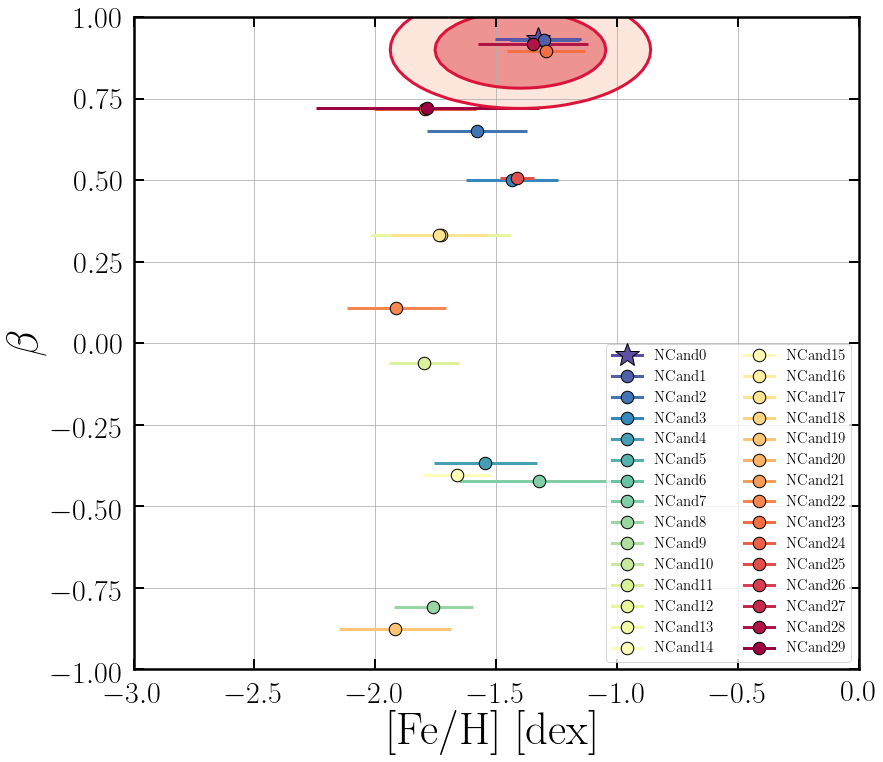

In [440]:
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)

nbins = 100

betamin = -1.0
betamax = 1.0
fehmin = -3.0
fehmax = 0.0

colsubs = flipud(cm.Spectral(linspace(0.0,1.0,num_cands)))

fehs = zeros(shape=num_cands)
betas = zeros(shape=num_cands)
fehs_err = zeros(shape=num_cands)
betas_err = zeros(shape=num_cands)
for i in range(0,num_cands):
    Cand = df.loc[df['group_id'] == names[i]]
    vr,vphi,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel
    sigr,sigphi,sigz = std(vr),std(vphi),std(vz)
    beta_stars = 1.0-(vphi**2.0+vz**2.0)/(2*vr**2.0)
    sigr = std(Cand.GalRVel)
    sigphi = std(Cand.GalTVel)
    sigz = std(Cand.GalzVel)
    fehs[i] = mean(Cand.feh)
    fehs_err[i] = std(Cand.feh)
    betas[i] = 1-(sigphi**2.0+sigz**2.0)/(2*sigr**2.0)
    betas_err[i] = std(beta_stars)
    if i==0:
        marker='*'
    else:
        marker='.'
    plt.errorbar(fehs[i],betas[i],xerr=fehs_err[i],markersize=25,color=colsubs[i,:],
                 marker=marker,linewidth=3,markeredgecolor='k',label=names[i])
    
feh_vals = linspace(fehmin,fehmax,nbins)
beta_vals = linspace(betamin,betamax,nbins)
Feh_vals,Beta_vals = meshgrid(feh_vals,beta_vals)
feh_saus = -1.4
sig_feh_saus = 0.3
beta_saus = 0.9
sig_beta_saus = 0.1             
Saus = exp(-(Feh_vals-feh_saus)**2.0/(2*sig_feh_saus**2.0)-(Beta_vals-beta_saus)**2.0/(2*sig_beta_saus**2.0))
plt.contourf(feh_vals,beta_vals,Saus,'-',levels=[0.2,0.5,1.0],linewidths=3,cmap=cm.Reds,alpha=0.5)
plt.contour(feh_vals,beta_vals,Saus,'-',levels=[0.2,0.5,1.0],linewidths=3,colors='Crimson')
leg = plt.legend(loc='lower right',fontsize=15,ncol=2)

ax.grid()
ax.set_xlim(left=fehmin,right=fehmax)
ax.set_ylim(bottom=betamin,top=betamax)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"[Fe/H] [dex]",fontsize=45);
plt.ylabel(r"$\beta$",fontsize=45);

plt.show()

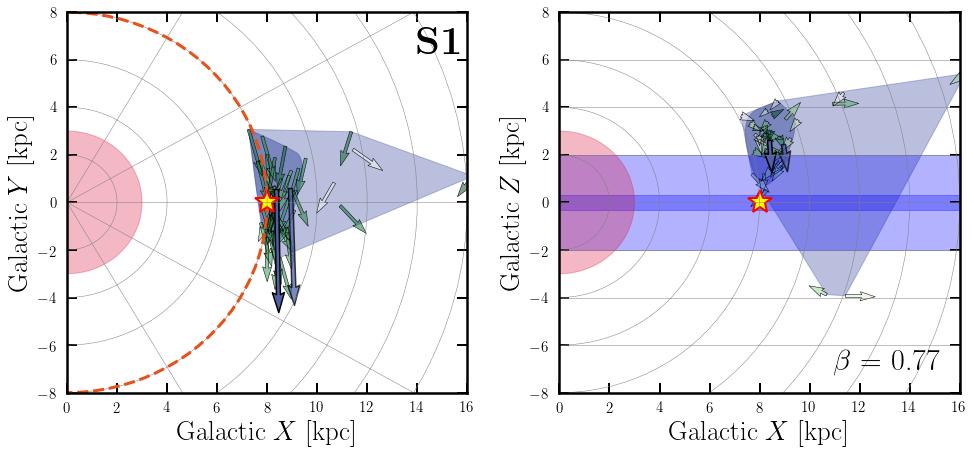

In [597]:
BulgeColour = 'Crimson'
DiskColour = 'Blue'
StarsColour = colsubs[i,:]
cmap = cm.Greens
xmin = 0.0
xmax = 16.0
Grid = True


name = 'S1'
Cand = pandas.read_csv('../S1_only_cat_simple.csv')

# i = 1
# name = names[i]
# Cand = df.loc[df['group_id'] == name]

##### Plot

def chaikins_corner_cutting(x_edge,y_edge, refinements=3):
    edge=zeros(shape=(size(x_edge)+1,2))
    edge[:-1,0] = x_edge
    edge[:-1,1] = y_edge
    edge[-1,0] = x_edge[0]
    edge[-1,1] = y_edge[0]
    coords = array(edge)
    for _ in range(refinements):
        L = coords.repeat(2, axis=0)
        R = np.empty_like(L)
        R[0] = L[0]
        R[2::2] = L[1:-1:2]
        R[1:-1:2] = L[2::2]
        R[-1] = L[-1]
        coords = L * 0.75 + R * 0.25

    return coords

from scipy.spatial import ConvexHull
 
fig, axarr = plt.subplots(1, 2,figsize=(16,7))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.23)
ax_xy = plt.subplot(gs[0])
ax_xz = plt.subplot(gs[1])


x,y,z = Cand.GalRecX,Cand.GalRecY,Cand.GalRecZ
U,V,W = Cand.GalU,Cand.GalV,Cand.GalW

# reduced points
z_th = 6.0
ZSCORE = abs(zscore(z))+abs(zscore(x))+abs(zscore(y))\
        +abs(zscore(U))+abs(zscore(V))+abs(zscore(W))
x_red = x[ZSCORE<z_th]
y_red = y[ZSCORE<z_th]
z_red = z[ZSCORE<z_th]
U_red = U[ZSCORE<z_th]
V_red = V[ZSCORE<z_th]
W_red = W[ZSCORE<z_th]

# Convex hull full
points = zeros(shape=(size(x),2))
points[:,0] = x
points[:,1] = y
hull = ConvexHull(points)
x_edge = points[hull.vertices,0]
y_edge = points[hull.vertices,1]
ax_xy.fill(x_edge,y_edge,alpha=0.4,color=StarsColour,zorder=0)

points = zeros(shape=(size(x),2))
points[:,0] = x
points[:,1] = z
hull = ConvexHull(points)
x_edge = points[hull.vertices,0]
z_edge = points[hull.vertices,1]
ax_xz.fill(x_edge,z_edge,alpha=0.4,color=colsubs[i,:],zorder=0)

# Convex hull reduced
points = zeros(shape=(size(x_red),2))
points[:,0] = x_red
points[:,1] = y_red
hull = ConvexHull(points)
x_edge = points[hull.vertices,0]
y_edge = points[hull.vertices,1]
hull_smooth = chaikins_corner_cutting(x_edge,y_edge)
ax_xy.fill(hull_smooth[:,0],hull_smooth[:,1],alpha=0.6,color=StarsColour,zorder=0)

points[:,1] = z_red
hull = ConvexHull(points)
x_edge = points[hull.vertices,0]
z_edge = points[hull.vertices,1]
hull_smooth = chaikins_corner_cutting(x_edge,z_edge)
ax_xz.fill(hull_smooth[:,0],hull_smooth[:,1],alpha=0.6,color=StarsColour,zorder=0)


# Points
#ax_xy.plot(x,y,'.',markersize=10,color=colsubs[i,:])
#ax_xz.plot(x,z,'.',markersize=10,color=colsubs[i,:])    

# Arrows
ax_xy.quiver(x,y,U,V,z,alpha=0.5,cmap=cmap,scale=3000.0,zorder=1)
ax_xy.quiver(x,y,U,V,edgecolor='k', facecolor='None', linewidth=.5,scale=3000.0,zorder=1)
ax_xz.quiver(x,z,U,W,-y,alpha=0.5,cmap=cmap,scale=3000.0,zorder=1)
ax_xz.quiver(x,z,U,W,edgecolor='k', facecolor='None', linewidth=.5,scale=3000.0,zorder=1)

# bulge 
r_bulge = 3.0
th = linspace(-pi,pi,100)
ax_xy.fill(r_bulge*cos(th),r_bulge*sin(th),color=BulgeColour,alpha=0.3)
ax_xz.fill(r_bulge*cos(th),r_bulge*sin(th),color=BulgeColour,alpha=0.3)


# disk
z_thick = 2.0
z_thin = 0.3
ax_xz.fill_between([xmin,xmax],[z_thick,z_thick],y2=-z_thick,color=DiskColour,alpha=0.3)
ax_xz.fill_between([xmin,xmax],[z_thin,z_thin],y2=-z_thin,color=DiskColour,alpha=0.3)


# The sun
ax_xy.plot(8.0*cos(th),8.0*sin(th),'--',linewidth=3,color='orangered')
ax_xy.plot(8.0,0.0,'*',markerfacecolor='yellow',markersize=25,markeredgecolor='red',markeredgewidth=2)
ax_xz.plot(8.0,0.0,'*',markerfacecolor='yellow',markersize=25,markeredgecolor='red',markeredgewidth=2)

# Total moving group arrow
ax_xy.quiver(mean(x_red),mean(y_red),mean(U_red),mean(V_red),color=colsubs[i,:],scale=1000.0,linewidth=1.5,edgecolor='k',width=0.01)
ax_xz.quiver(mean(x_red),mean(z_red),mean(U_red),mean(W_red),color=colsubs[i,:],scale=1000.0,linewidth=1.5,edgecolor='k',width=0.01)

ax_xy.quiver(mean(x),mean(y),mean(U),mean(V),color=colsubs[i,:],alpha=0.75,scale=1000.0,linewidth=1.5,edgecolor='k',width=0.01)
ax_xz.quiver(mean(x),mean(z),mean(U),mean(W),color=colsubs[i,:],alpha=0.75,scale=1000.0,linewidth=1.5,edgecolor='k',width=0.01)


# xy labels
ax_xy.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=15)
ax_xy.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax_xy.set_xlabel(r"Galactic $X$ [kpc]",fontsize=27);
ax_xy.set_ylabel(r"Galactic $Y$ [kpc]",fontsize=27);

# xz labels
ax_xz.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=15)
ax_xz.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax_xz.set_xlabel(r"Galactic $X$ [kpc]",fontsize=27);
ax_xz.set_ylabel(r"Galactic $Z$ [kpc]",fontsize=27);

plt.gcf().text(0.47,0.85,r'\bf {'+name+r'}', fontsize=40,horizontalalignment='right',verticalalignment='top')  

if Grid:
    phi = linspace(-pi/2,pi/2,7)
    xvals = linspace(xmin,xmax,100)
    rvals = arange(xmin,xmax*1.5,2.0)
    nr = size(rvals)
    zvals = arange(-xmax,xmax,2.0)
    nz = size(zvals)
    for ii in range(0,7):
        ax_xy.plot(xvals,xvals*tan(phi[ii]),'-',color='gray',lw=0.5)
    for ii in range(0,nr):
        ax_xy.plot(rvals[ii]*cos(th),rvals[ii]*sin(th),'-',color='gray',lw=0.5)
        ax_xz.plot(rvals[ii]*cos(th),rvals[ii]*sin(th),'-',color='gray',lw=0.5)
    for ii in range(0,nz):
        ax_xz.plot([xmin,xmax],[zvals[ii],zvals[ii]],'-',color='gray',lw=0.5)
    ax_xy.set_yticks(arange(-xmax,xmax,2.0))
    ax_xz.set_yticks(arange(-xmax,xmax,2.0))

ax_xy.set_xlim([xmin,xmax])
ax_xy.set_ylim([-xmax/2.0,xmax/2.0])
ax_xz.set_xlim([xmin,xmax])
ax_xz.set_ylim([-xmax/2.0,xmax/2.0])

sigr = std(Cand.GalRVel)
sigphi = std(Cand.GalTVel)
sigz = std(Cand.GalzVel)
beta = 1.0-(sigz**2.0+sigphi**2.0)/(2*sigr**2.0)
plt.gcf().text(0.79, 0.17, r'$\beta$ = '+r'{:.2f}'.format(beta), fontsize=30)
fig.savefig('../plots/stars/XYZ_'+name+'.pdf',bbox_inches='tight')


plt.show()

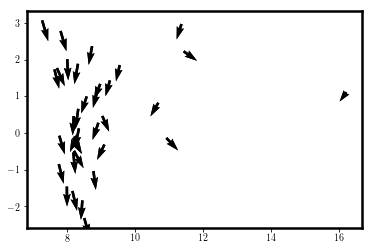

In [332]:
S1 = pandas.read_csv('../S1_only_cat_simple.csv')
x = S1.GalRecX
y = S1.GalRecY
vx = S1.GalU
vy = S1.GalV

r = S1.GalR
phi = S1.Galphi
vr = S1.GalRVel
vphi = S1.GalphiVel

plt.quiver(x,y,vx,vy)
plt.quiver(r*cos(phi),r*sin(phi),cos(phi)*vr-sin(phi)*vphi,sin(phi)*vr+cos(phi)*vphi)
plt.show()

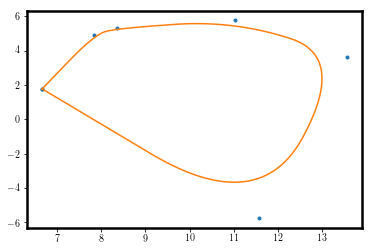

In [522]:
def chaikins_corner_cutting(coords, refinements=5):
    coords = array(coords)

    for _ in range(refinements):
        L = coords.repeat(2, axis=0)
        R = np.empty_like(L)
        R[0] = L[0]
        R[2::2] = L[1:-1:2]
        R[1:-1:2] = L[2::2]
        R[-1] = L[-1]
        coords = L * 0.75 + R * 0.25

    return coords
edge=zeros(shape=(size(x_edge)+1,2))
edge[:-1,0] = x_edge
edge[:-1,1] = z_edge
edge[-1,0] = x_edge[0]
edge[-1,1] = z_edge[0]
hull_smooth = chaikins_corner_cutting(edge,refinements=5)
plt.plot(edge[:,0],edge[:,1],'.')
plt.plot(hull_smooth[:,0],hull_smooth[:,1])
plt.show()

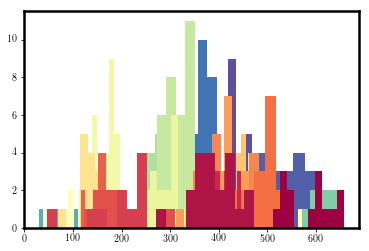

In [424]:
for i in range(0,num_cands):
    Cand = df.loc[df['group_id'] == names[i]]
    Vtot = sqrt(Cand.U**2.0+Cand.V**2.0 +Cand.W**2.0)
    plt.hist(Vtot,color=colsubs[i,:],bins=10)
    
plt.show()

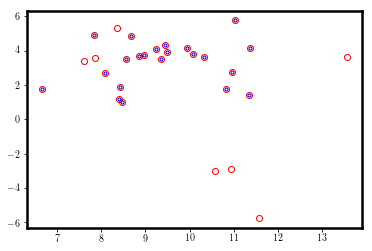

In [554]:
from scipy.stats import *

z_th = 3.0
ZSCORE = abs(zscore(z))+abs(zscore(x))+abs(zscore(y))
x_red = x[ZSCORE<z_th]
y_red = y[ZSCORE<z_th]
z_red = z[ZSCORE<z_th]

plt.plot(x[ZSCORE<z_th],z[ZSCORE<z_th],'b.',markerfacecolor='none')

plt.show()


In [560]:
ZSCORE = abs(zscore(z))+abs(zscore(x))+abs(zscore(y))+abs(zscore(U))+abs(zscore(V))+abs(zscore(W))
ZSCORE

array([ 3.59220931,  3.38334911,  4.24427275,  5.42218799,  4.10975858,
        3.18316374,  4.90366553,  5.303494  ,  7.11584194,  3.91588954,
        7.91231412,  4.5578511 ,  4.99776276,  5.36521051,  5.844648  ,
        4.98965394,  6.72516782,  5.14541089,  6.10606006,  4.69527773,
        5.00702631,  2.23515947,  7.39554847,  2.98780987,  4.82579421,
        3.91863846,  4.58184602,  9.01660271,  2.78960318])